In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [98]:
df = pd.read_csv("complaints.csv")
df.head()

STT          Ngày gửi                                           Nội dung  \
0    1  09/06/2024 19:16  Tôi phản ánh lần 2 về bóng điện đường ở tổ dân...   
1    2  09/06/2024 09:38  Tôi là Nguyễn Thị Yến, sinh năm 1962, hiện trú...   
2    3  08/06/2024 18:29  Tôi là hộ dân sinh sống tại tổ dân phố 6, thị ...   
3    4  08/06/2024 17:00  Tôi phản ánh về việc dẹp các quán bán nước ở v...   
4    5  08/06/2024 09:10  Tôi phản ánh lần 2 về hai trang trại chăn nuôi...   

                                        Đơn vị xử lý  \
0                        HĐND - UBND - Huyện Văn Yên   
1                             UBND thành phố Yên Bái   
2                             HĐND - UBND - Trấn Yên   
3  UBND phường Trung Tâm - Nghĩa Lộ, UBND phường ...   
4                              UBND  phường Yên Ninh   

                             Topic Sentiment  
0     Public Infrastructure Issues  Negative  
1  Legal and Administrative Issues  Negative  
2         Land and Property Issues  Negative  
3             Business Regulations  Negative  
4             Environmental Issues  Negative

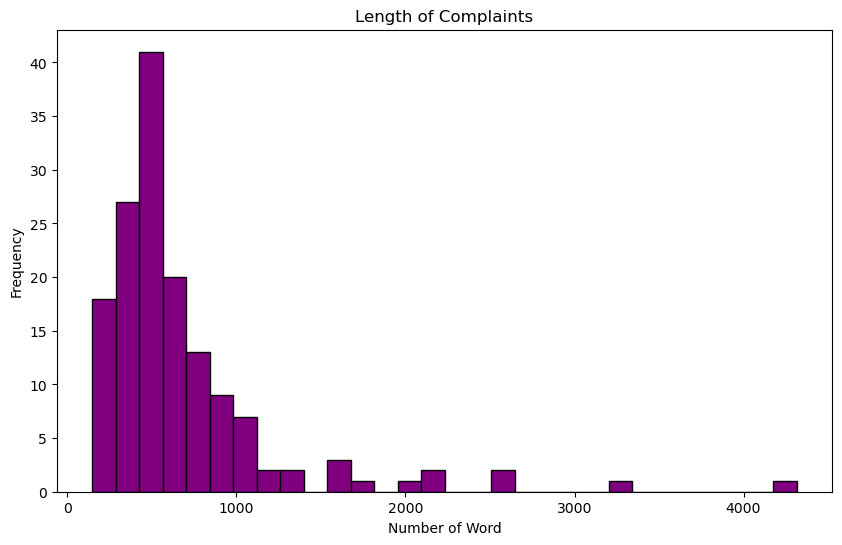

In [99]:
df['Complaint Length'] = df['Nội dung'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['Complaint Length'], bins=30, color='purple', edgecolor='black')
plt.title('Length of Complaints')
plt.xlabel('Number of Word')
plt.ylabel('Frequency')
plt.show()


In [100]:
df['Topic'].nunique()

21

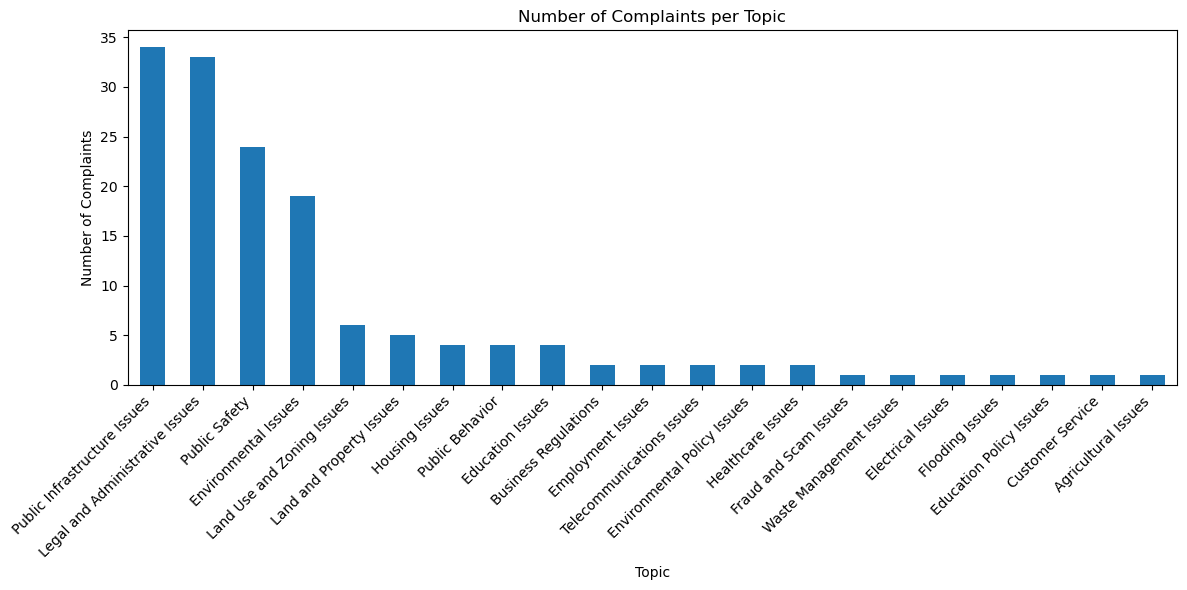

In [101]:
topic_counts = df['Topic'].value_counts()
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Number of Complaints per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

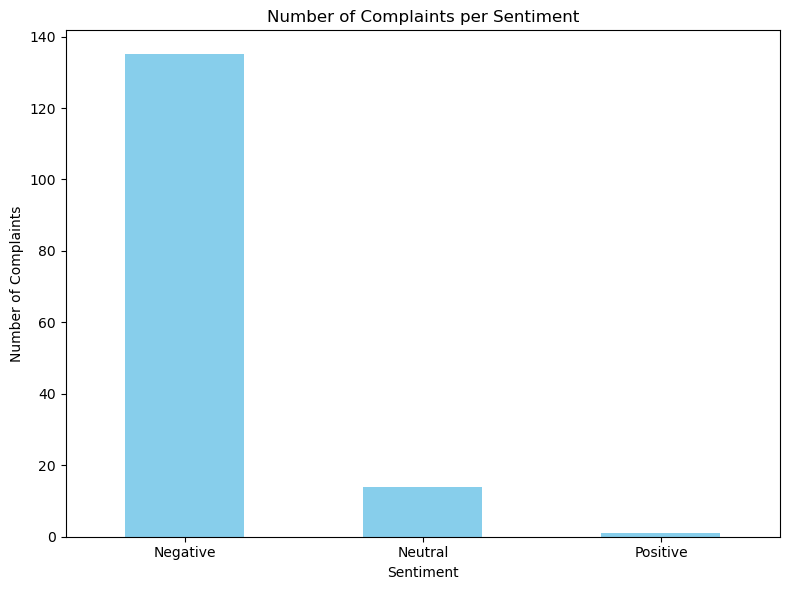

In [102]:
# Count the number of complaints for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

  MonthYear  Number of Complaints
0   2024-04                    18
1   2024-05                   101
2   2024-06                    31


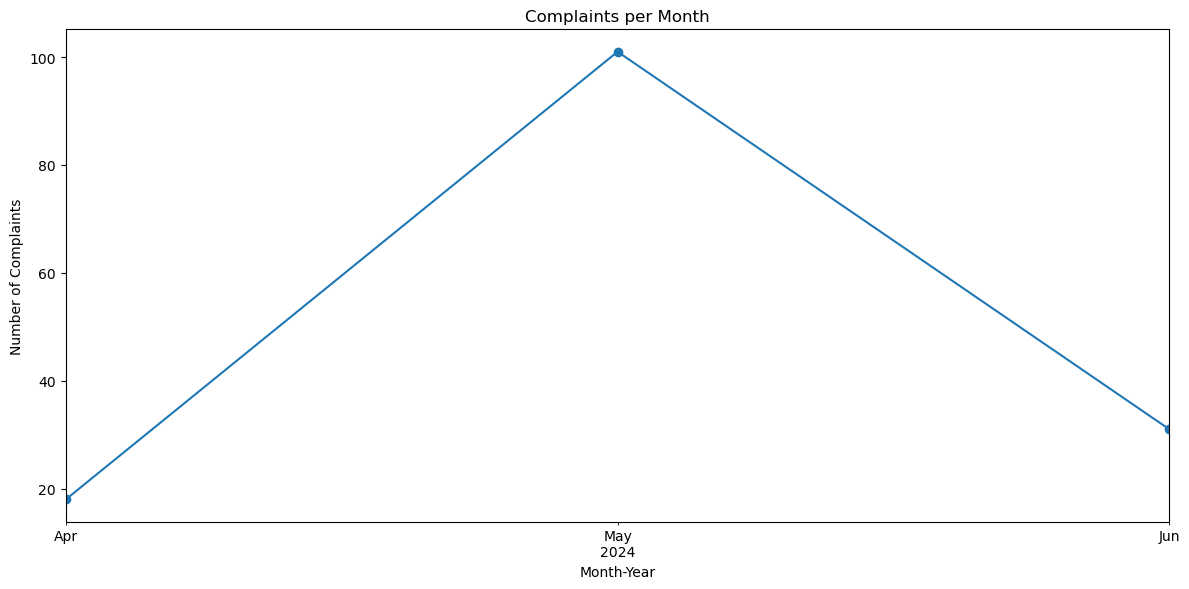

In [103]:
df['Ngày gửi'] = pd.to_datetime(df['Ngày gửi'], dayfirst=True)

# Extract the month and year from 'Ngày gửi'
df['MonthYear'] = df['Ngày gửi'].dt.to_period('M')

# Count the number of complaints per month
complaints_per_month = df['MonthYear'].value_counts().sort_index()

# Display the DataFrame with complaints per month
complaints_per_month_df = complaints_per_month.to_frame().reset_index()
complaints_per_month_df.columns = ['MonthYear', 'Number of Complaints']
print(complaints_per_month_df)

# Plot the number of complaints per month
plt.figure(figsize=(12, 6))
complaints_per_month.plot(kind='line', marker='o')
plt.title('Complaints per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

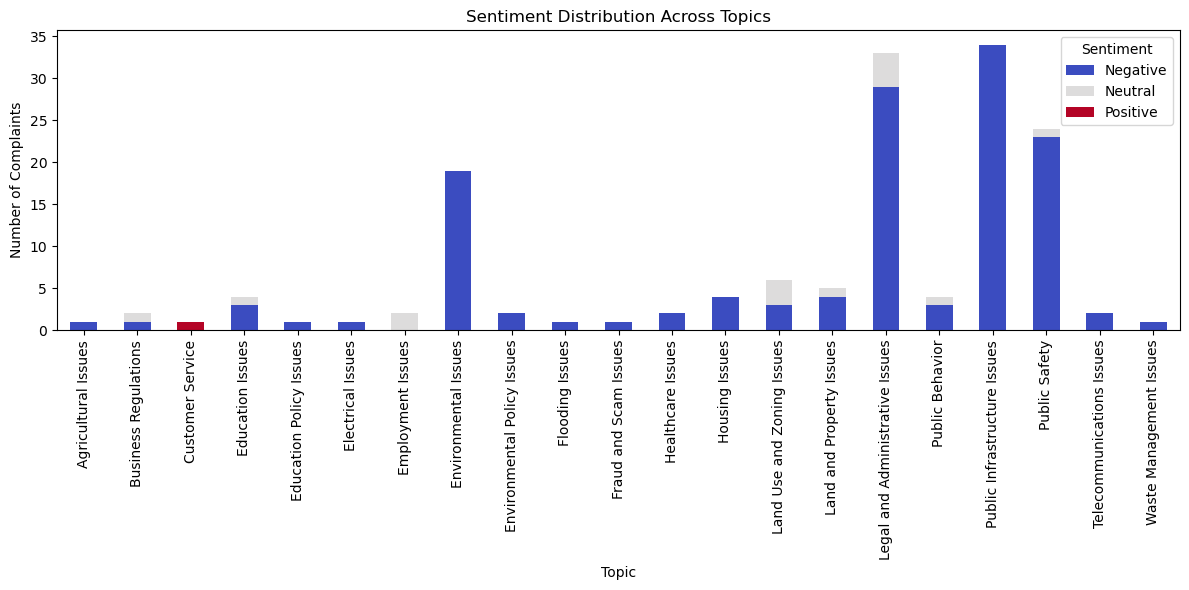

In [104]:
topic_sentiment_counts = df.groupby(['Topic', 'Sentiment']).size().unstack()

topic_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Sentiment Distribution Across Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Complaints')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [118]:
import pandas as pd
import re
from underthesea import word_tokenize

# Load dataset
df = pd.read_csv('complaints.csv')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Apply cleaning function
df['Cleaned_Nội_dung'] = df['Nội dung'].apply(clean_text)

# Define Vietnamese stopwords
vietnamese_stopwords = set([
    'bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 
    'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 
    'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 
    'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 
    'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'về', 'với', 'vừa',
    ## additional stop words
    'tuy_nhiên', 'gia_đình', 'chúng_tôi', 'tôi', 'trân_trọng', 'cảm_ơn', 'đề_nghị', 'phản ánh'
])

# Tokenize and remove stopwords using underthesea
def remove_stopwords(text, stopwords):
    words = word_tokenize(text, format="text")
    words = [word for word in words.split() if word not in stopwords]
    return ' '.join(words)

# Apply stopword removal
df['Cleaned_Nội_dung'] = df['Cleaned_Nội_dung'].apply(lambda x: remove_stopwords(x, vietnamese_stopwords))
df.head()

STT          Ngày gửi                                           Nội dung  \
0    1  09/06/2024 19:16  Tôi phản ánh lần 2 về bóng điện đường ở tổ dân...   
1    2  09/06/2024 09:38  Tôi là Nguyễn Thị Yến, sinh năm 1962, hiện trú...   
2    3  08/06/2024 18:29  Tôi là hộ dân sinh sống tại tổ dân phố 6, thị ...   
3    4  08/06/2024 17:00  Tôi phản ánh về việc dẹp các quán bán nước ở v...   
4    5  08/06/2024 09:10  Tôi phản ánh lần 2 về hai trang trại chăn nuôi...   

                                        Đơn vị xử lý  \
0                        HĐND - UBND - Huyện Văn Yên   
1                             UBND thành phố Yên Bái   
2                             HĐND - UBND - Trấn Yên   
3  UBND phường Trung Tâm - Nghĩa Lộ, UBND phường ...   
4                              UBND  phường Yên Ninh   

                             Topic Sentiment  \
0     Public Infrastructure Issues  Negative   
1  Legal and Administrative Issues  Negative   
2         Land and Property Issues  Negative   
3             Business Regulations  Negative   
4             Environmental Issues  Negative   

                                    Cleaned_Nội_dung  
0  phản_ánh lần bóng_điện đường ở tổ_dân_phố thị_...  
1  nguyễn_thị yến sinh năm hiện_trú thôn bảo_yên ...  
2  hộ dân sinh_sống tổ_dân_phố thị_trấn cổ_phúc h...  
3  phản_ánh việc dẹp quán bán nước ở vỉa_hè thị_x...  
4  phản_ánh lần hai trang_trại chăn_nuôi lợn xả_t...

In [125]:
def get_top_words(text, n=10):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    return [word for word, freq in sorted_words]

# Get unique topics
topics = df['Topic'].unique()

# Prepare the DataFrame to store the results
results = []

for topic in topics:
    text = ' '.join(df[df['Topic'] == topic]['Cleaned_Nội_dung'])
    top_words = get_top_words(text)
    results.append({'Topic': topic, 'Top 10 words': ', '.join(top_words)})

# Create a DataFrame with the results
topics_df = pd.DataFrame(results)
topics_df.head()

Topic  \
0     Public Infrastructure Issues   
1  Legal and Administrative Issues   
2         Land and Property Issues   
3             Business Regulations   
4             Environmental Issues   

                                                            Top 10 words  
0  đường, huyện, đến, hộ, xã, người_dân, giao_thông, làm, phản_ánh, kính  
1                     xã, đất, đến, làm, năm, xin, thôn, huyện, nhà, tên  
2       nhà, đường, đất, suối, trong, đến, công_trình, kè, làm, đồng_tâm  
3         dẹp, bán, hoạt_động, nước, quán, xin, bà, cơ_sở, nghĩa_lộ, năm  
4    gây, xã, người_dân, huyện, phản_ánh, đến, ảnh_hưởng, làm, thôn, dân

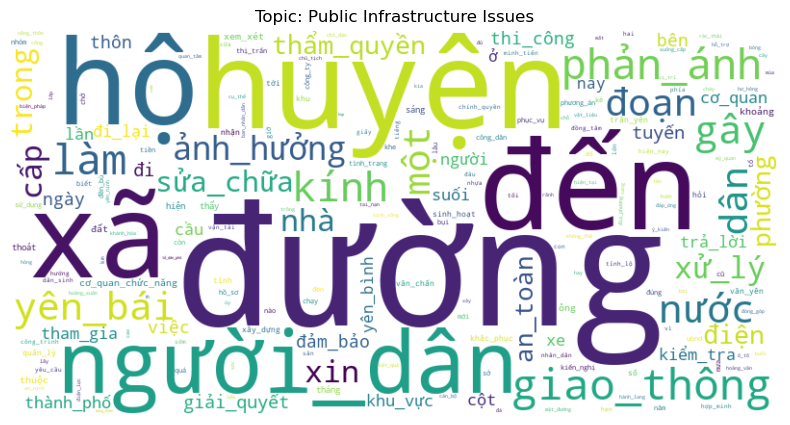

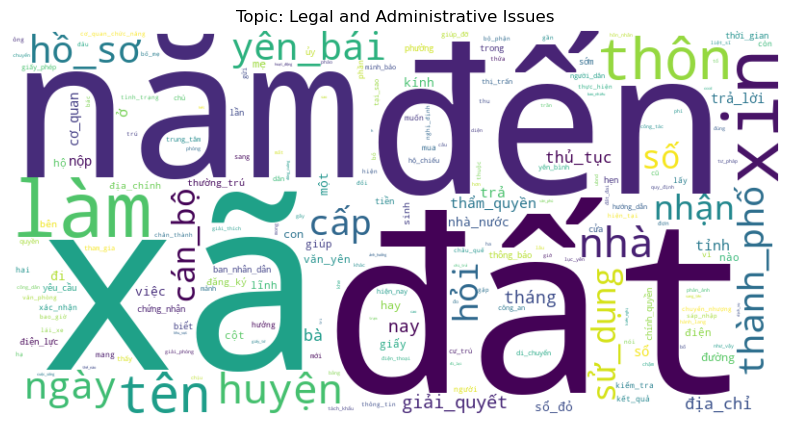

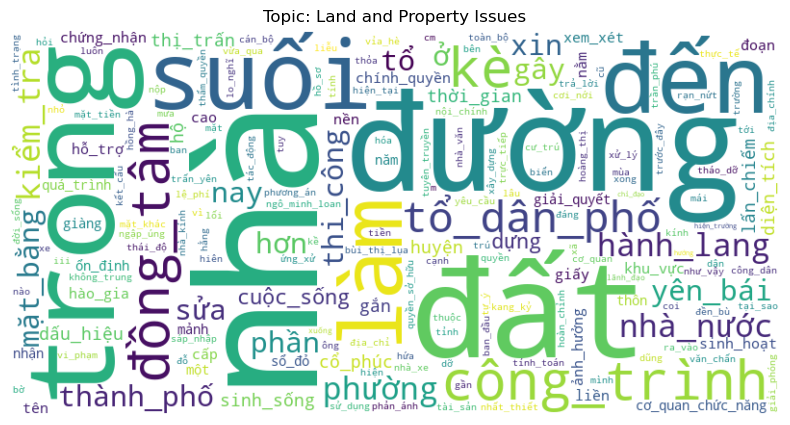

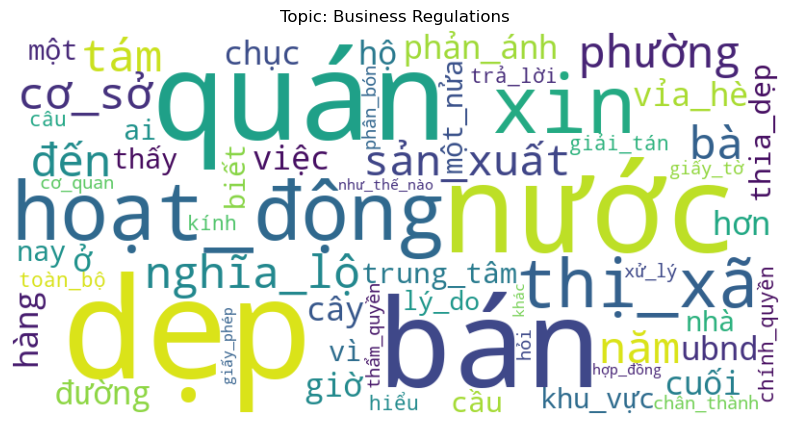

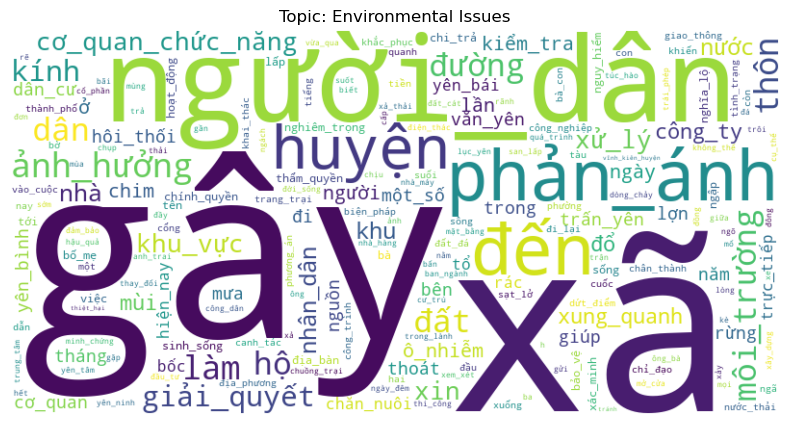

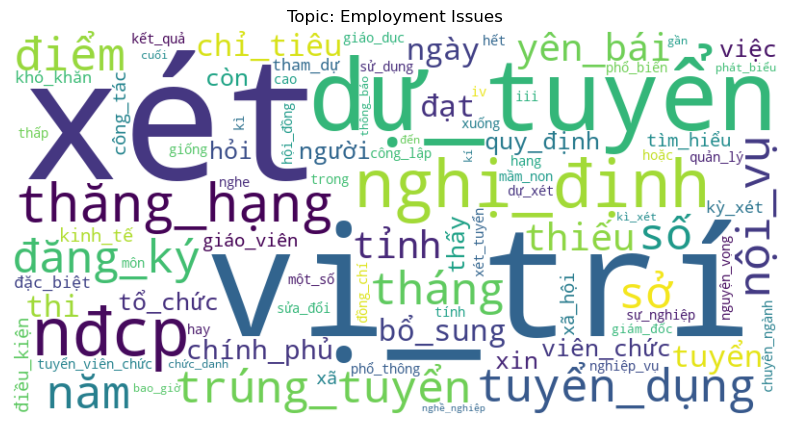

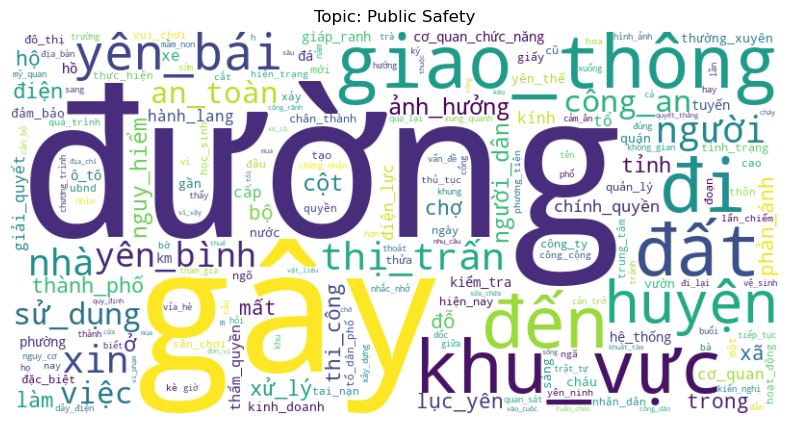

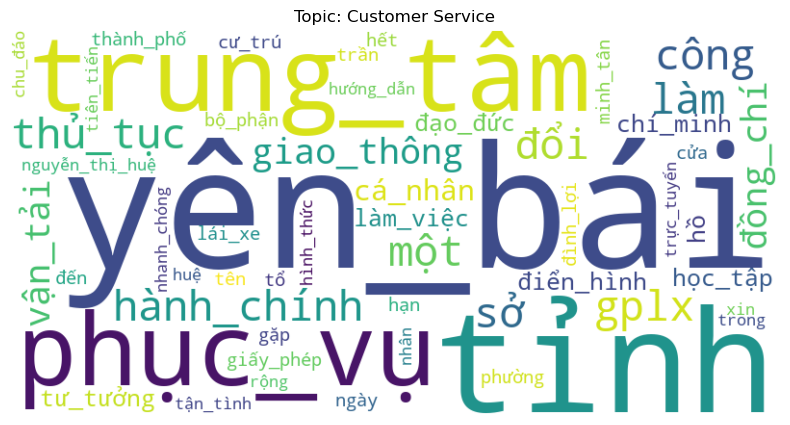

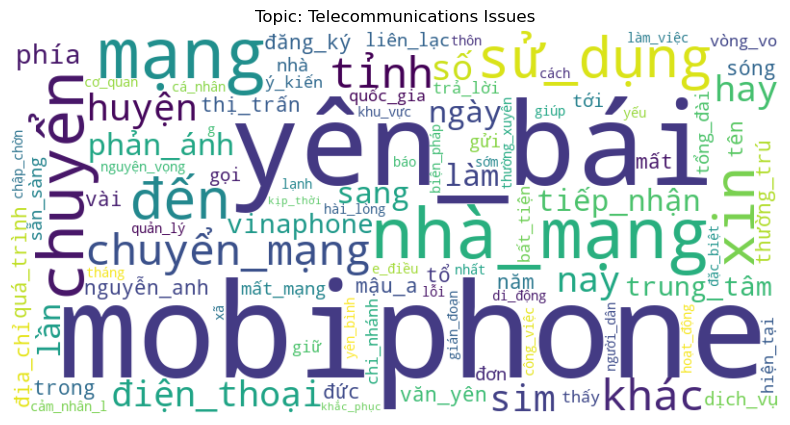

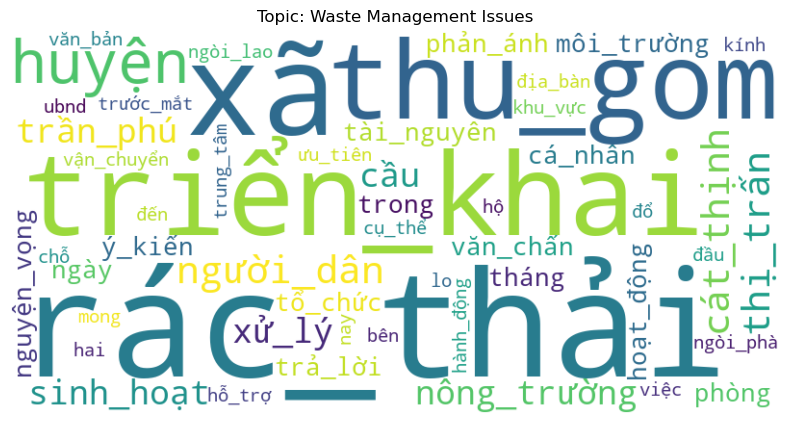

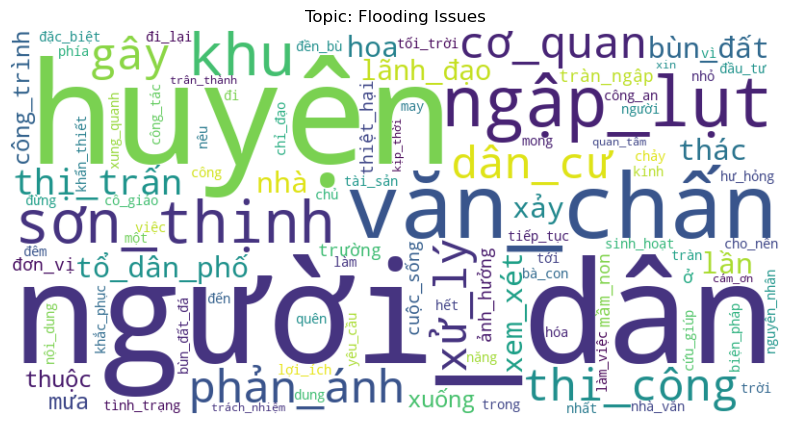

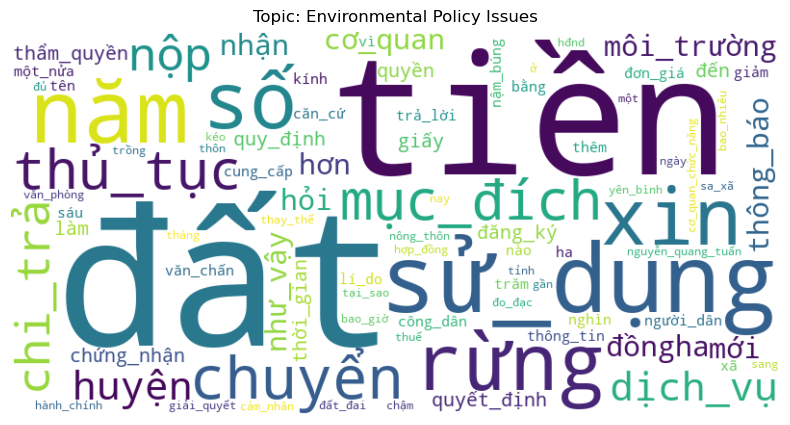

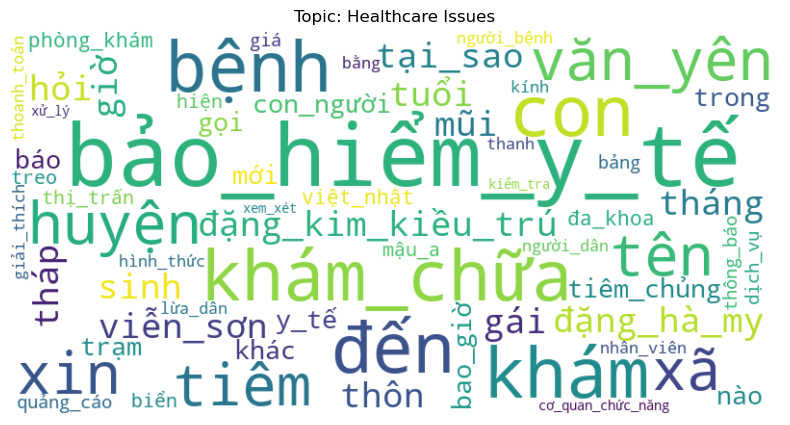

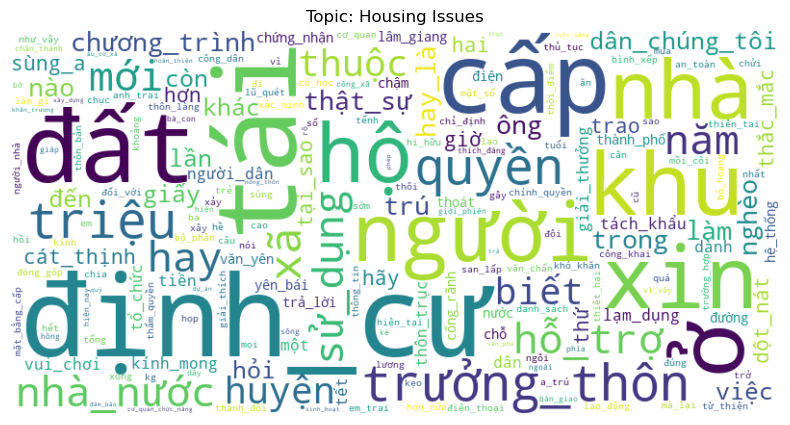

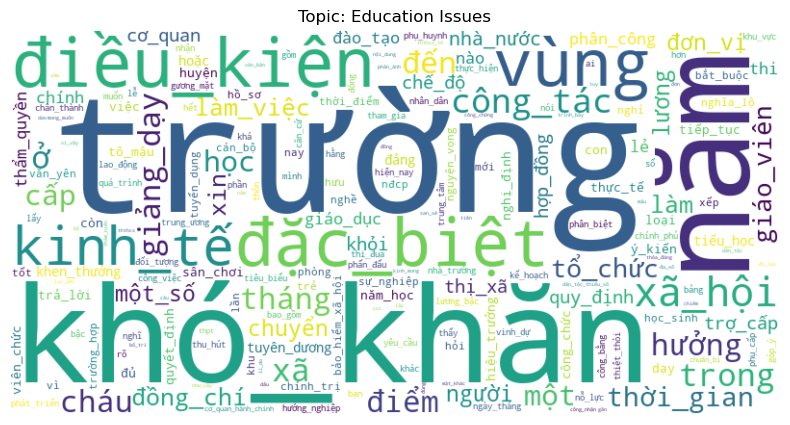

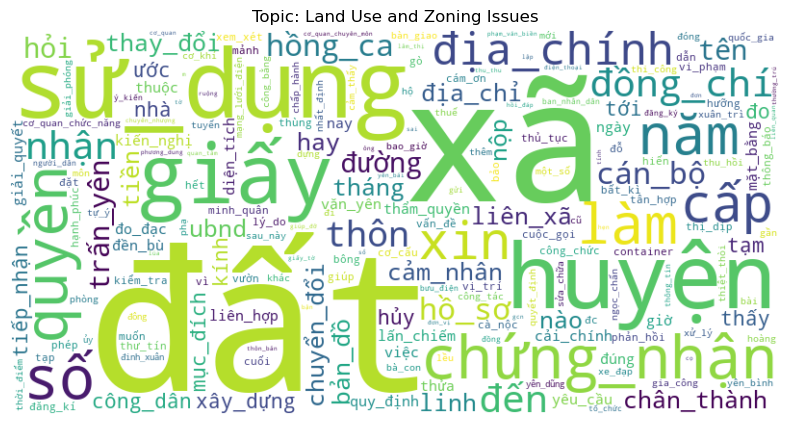

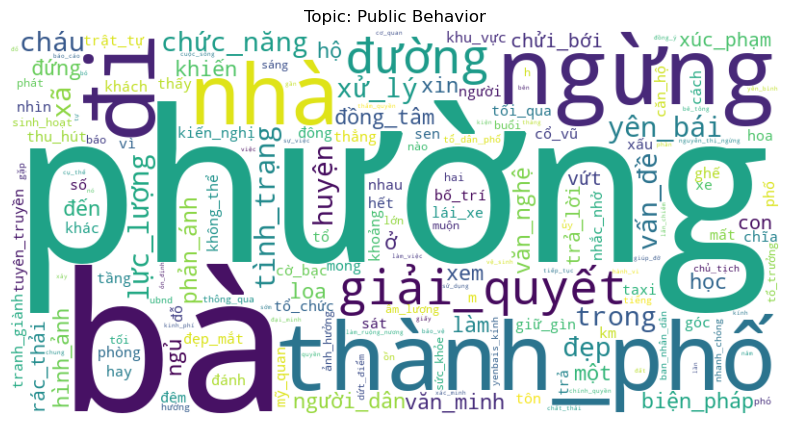

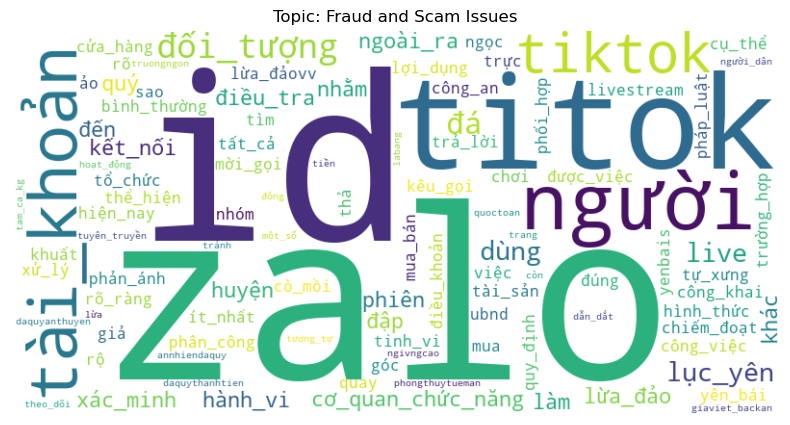

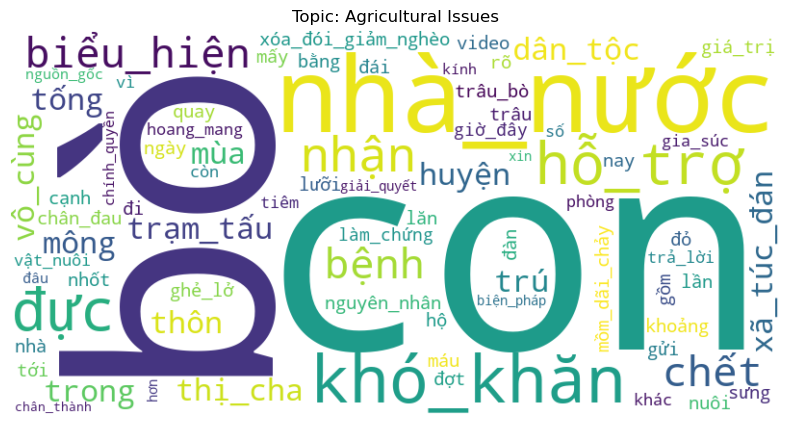

In [106]:
topics = df['Topic'].unique()

for topic in topics:
    text = ' '.join(df[df['Topic'] == topic]['Cleaned_Nội_dung'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic: {topic}')
    plt.show()

## LDA

In [107]:
import pandas as pd
import re
from underthesea import word_tokenize

# Load dataset
df = pd.read_csv('complaints.csv')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Apply cleaning function
df['Cleaned_Nội_dung'] = df['Nội dung'].apply(clean_text)

# Define Vietnamese stopwords
vietnamese_stopwords = set([
    'bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 
    'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 
    'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 
    'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 
    'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'về', 'với', 'vừa',
    ## additional stop words
    'tuy_nhiên', 'gia_đình', 'chúng_tôi'
])

# Tokenize and remove stopwords using underthesea
def remove_stopwords(text, stopwords):
    words = word_tokenize(text, format="text")
    words = [word for word in words.split() if word not in stopwords]
    return ' '.join(words)

# Apply stopword removal
df['Cleaned_Nội_dung'] = df['Cleaned_Nội_dung'].apply(lambda x: remove_stopwords(x, vietnamese_stopwords))


In [108]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(min_df=15, max_df=0.5)  # Adjust min_df and max_df as needed
doc_term_matrix = vectorizer.fit_transform(df['Cleaned_Nội_dung'])


In [109]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
num_topics = 8  # You can adjust this number based on the paper's recommendation

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Get the topics and their top words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Print the top words for each topic
n_top_words = 15
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)


Topic #0:
đường người_dân giao_thông phường ảnh_hưởng phản_ánh yên_bái giải_quyết thành_phố nhà tổ kính gây xử_lý chính_quyền
Topic #1:
nhà đường yên_bình làm đi bên giải_quyết nay tên chính_quyền thôn thấy thị_trấn kính tổ
Topic #2:
tiền năm một người vì hết số làm nhận hay thuộc nào biết cơ_quan kính
Topic #3:
điện người_dân xử_lý hộ phản_ánh văn_chấn kính thị_trấn dân khu nhà cơ_quan_chức_năng việc hiện_nay gây
Topic #4:
đường gây khu_vực giao_thông người người_dân đi ảnh_hưởng đoạn phản_ánh thi_công cơ_quan_chức_năng an_toàn trong yên_bái
Topic #5:
năm yên_bái tháng trong thành_phố trả_lời tỉnh người lần ngày cơ_quan còn làm hỏi số
Topic #6:
đất hộ làm nước nhà dân thôn cấp năm khu sử_dụng nhà_nước chính_quyền gây việc
Topic #7:
đất thôn sử_dụng hồ_sơ cấp làm tên giấy nhận số cán_bộ nộp thủ_tục ngày năm



In [110]:
import pyLDAvis
import pyLDAvis.lda_model

# Prepare the visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda, doc_term_matrix, vectorizer)

# Display the visualization
pyLDAvis.display(vis)


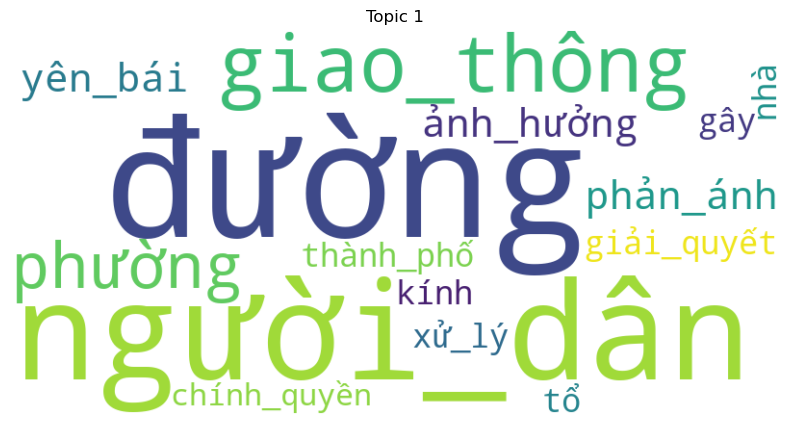

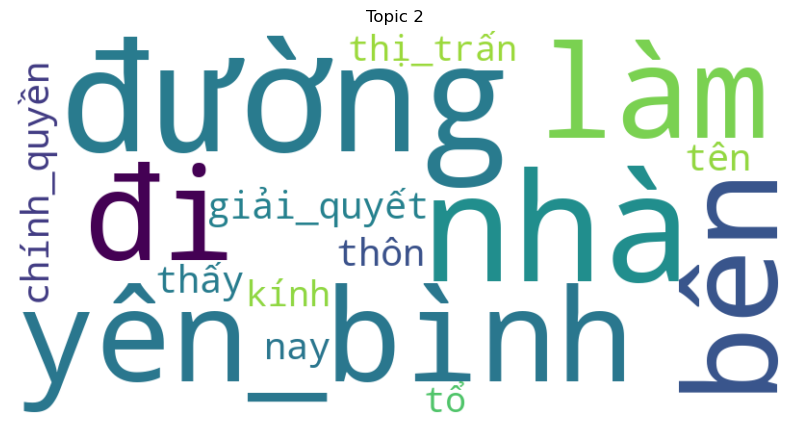

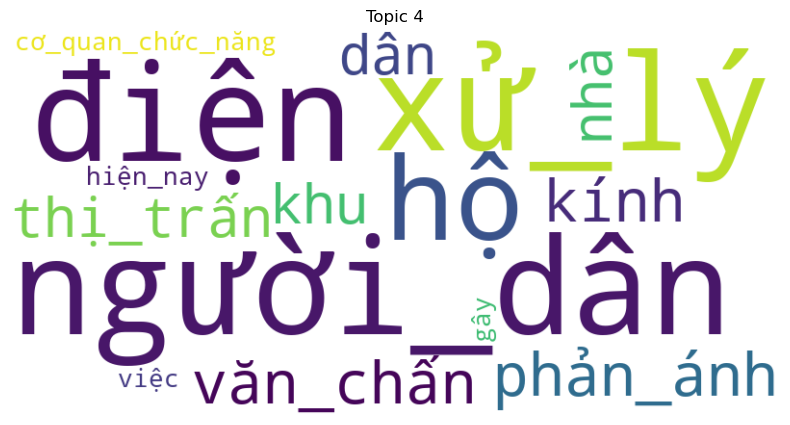

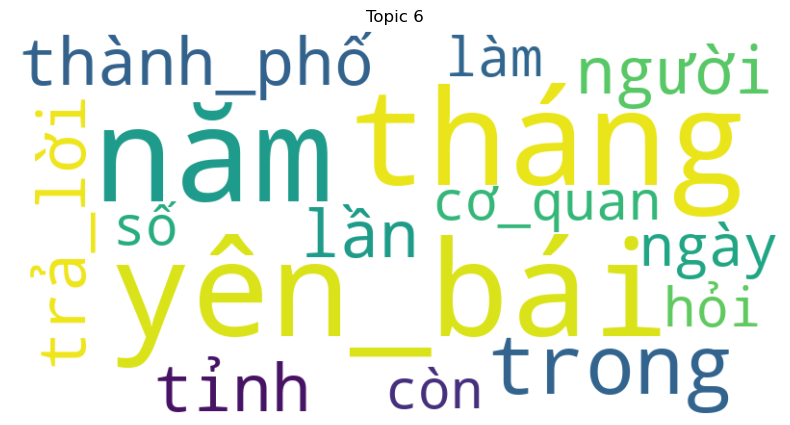

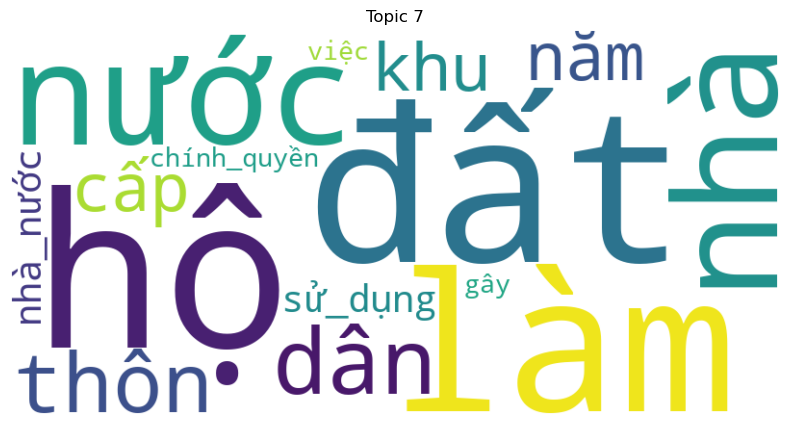

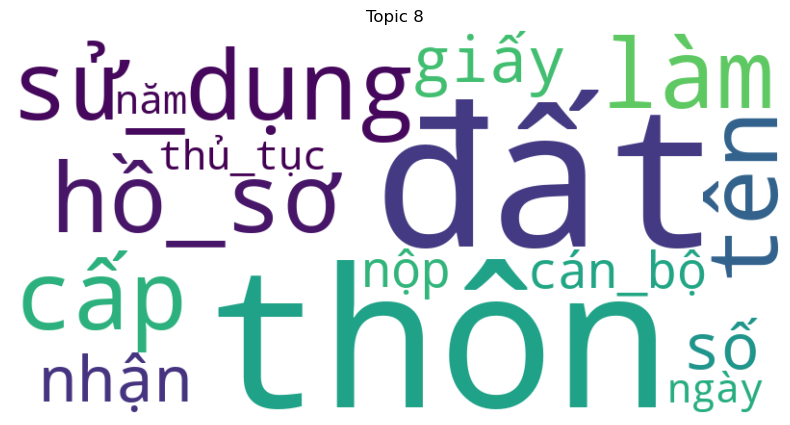

In [111]:
# Get the topics and their top words
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda, feature_names, 15)

# Generate word clouds for each topic
for idx, words in enumerate(top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx+1}')
    plt.show()


## Suggestion
- Get more data(demographic, location, time series)
- LLM or LDA
    - Reproducibility and Explanability
    - Accuracy
- Crawling upon keywords but unlikely to yield smart city terminology due to
    - Not reflective of public opinion
    - Not significant compare to a sea of other topics
    - Scope: which sites to include in crawling process